In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
mkdir vgg

In [ ]:
cd vgg

/content/drive/MyDrive/vgg


In [ ]:
!unzip /content/drive/MyDrive/braintumordataset.zip -d /content/drive/MyDrive/vgg

Archive:  /content/drive/MyDrive/braintumordataset.zip
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(17).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(18).jpg  
  inflating: /content/drive/MyDrive/vgg/Testing/glioma_tumor/image(19).jpg  
  inflating: /content

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D,Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np

In [ ]:
train_datasets = "/content/drive/MyDrive/vgg/Training"
validation_datasets = "/content/drive/MyDrive/vgg/Testing"

In [ ]:
def prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size):

    train_datasets_generator = ImageDataGenerator(rescale=1./255,
                                                  shear_range = 0.2,
                                                  zoom_range = 0.2,
                                                  horizontal_flip = True,
                                                  fill_mode = "nearest")


    validation_datasets_generator = ImageDataGenerator(rescale=1.0/255)


    train_datasets_generator_data = train_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = train_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )

    validation_datasets_generator_data = validation_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = validation_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )


    return train_datasets_generator_data, validation_datasets_generator_data

In [ ]:
batch_size = 64
image_size = 224

In [ ]:
train_data , validation_data = prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense




base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3), pooling=None)

# Freeze the layers of the model
for layer in base_model.layers:
    layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(GlobalMaxPooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 20289092 (77.40 MB)
Trainable params: 264708 (1.01 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
history = model.fit(train_data,
                    steps_per_epoch = len(train_data),
                    epochs = 20,
                    validation_data = validation_data,
                    validation_steps = len(validation_data)
                    )

Epoch 1/20
45/45 [==============================] - 55s 1s/step - loss: 0.3423 - accuracy: 0.8753 - val_loss: 1.2135 - val_accuracy: 0.6726
Epoch 2/20
45/45 [==============================] - 54s 1s/step - loss: 0.3436 - accuracy: 0.8676 - val_loss: 1.4585 - val_accuracy: 0.6574
Epoch 3/20
45/45 [==============================] - 54s 1s/step - loss: 0.3550 - accuracy: 0.8631 - val_loss: 1.2892 - val_accuracy: 0.6777
Epoch 4/20
45/45 [==============================] - 54s 1s/step - loss: 0.3931 - accuracy: 0.8449 - val_loss: 1.1661 - val_accuracy: 0.6904
Epoch 5/20
45/45 [==============================] - 54s 1s/step - loss: 0.3276 - accuracy: 0.8721 - val_loss: 1.4553 - val_accuracy: 0.6777
Epoch 6/20
45/45 [==============================] - 54s 1s/step - loss: 0.3654 - accuracy: 0.8592 - val_loss: 1.3705 - val_accuracy: 0.6726
Epoch 7/20
45/45 [==============================] - 55s 1s/step - loss: 0.3186 - accuracy: 0.8749 - val_loss: 1.2919 - val_accuracy: 0.6904
Epoch 8/20
45/45 [==

1/1 [==============================] - 0s 157ms/step


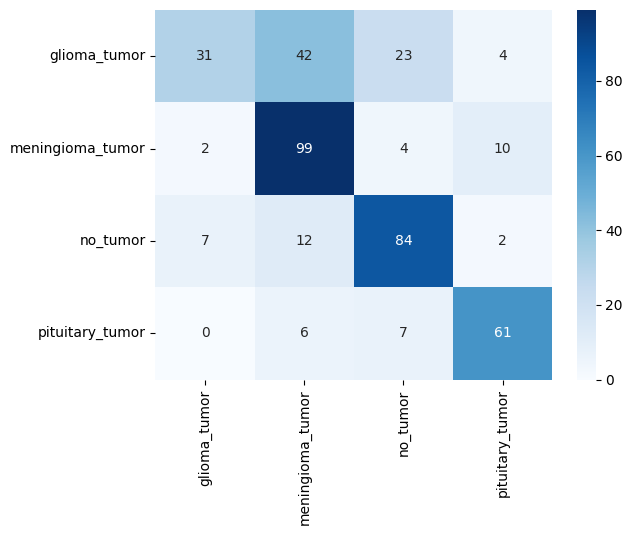

In [ ]:


from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_true = []
y_pred = []

for i in range(len(validation_data)):
  x, y = validation_data[i]
  y_true.extend(np.argmax(y, axis=1))
  y_pred.extend(np.argmax(model.predict(x), axis=1))

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=validation_data.class_indices, yticklabels=validation_data.class_indices)
plt.show()


In [ ]:

from sklearn.metrics import precision_score, accuracy_score, recall_score

precision = precision_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")


Precision: 0.7169363272084941
Accuracy: 0.7279695431472082
Recall: 0.7279695431472082
